In [1]:
import os

import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

sns.set()


 Derivative-Free Optimization for Least-Squares (DFO-LS) is a
 nonlinear least-squares solver that only requires function values.

 Documentation
 [https://numericalalgorithmsgroup.github.io/dfols/build/html/index.html](https://numericalalgorithmsgroup.github.io/dfols/build/html/index.html)

 Repository
 [https://github.com/numericalalgorithmsgroup/dfols](https://github.com/numericalalgorithmsgroup/dfols)

 Install using either:
 `conda install -c conda-forge dfo-ls`
 `pip install DFO-LS`

In [2]:
from dfols import solve


In [3]:
# project files
from rp_model.const import set_files_directory
set_files_directory("../files")

from rp_model.utils import pack, table, load, digest
from rp_model.calc import FitOptions, RoundApprox, compute_rp, make_precomputed_columns, make_initial_guess

RP model file path: ../files


In [4]:
# stuff for display

from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"

# progress bar

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 120)

In [5]:
data = pd.read_pickle(FitOptions.data_file)
data.describe()
data.head()

,Level,RP,MS lvl,ModelRP,Difference,Freq1,FreqL,Inv,Berry1,BerryL,Ing1P,Helps per hour,Helps Neutral,NrgMult,IngrMult,SkillMult,Ingr%,SklContr,BerryD,IngD,Dupes,Amnt,Ing2P,Help skill bonus,RP Multiplier
count,9089.000000,9089.000000,9089.000000,9089.000000,9089.000000,9089.000000,9089.000000,9089.000000,9089.000000,9089.000000,9089.000000,9089.000000,9089.000000,9089.000000,9089.000000,9089.000000,9089.000000,9089.000000,9089.000000,9089.000000,9089.0,9089.000000,9089.000000,9089.000000,9089.000000
mean,12.646386,704.425789,1.605017,704.387171,-0.038618,3819.166025,3645.790296,12.722852,28.081307,39.987787,108.765211,1.073698,0.987085,0.994138,0.999670,1.007019,0.209460,36.242952,59.378590,151.510727,1.0,0.164705,7.107052,0.983665,1.034909
std,8.468468,491.199275,1.082736,491.212369,0.664380,993.379342,1061.240317,3.636166,2.610012,9.780669,15.977065,0.331364,0.058258,0.044857,0.118993,0.119303,0.047036,41.444203,31.480915,66.328039,0.0,0.746945,31.430039,0.042778,0.076922
min,1.000000,245.000000,1.000000,245.000000,-17.000000,2200.000000,1489.118400,7.000000,24.000000,24.000000,90.000000,0.520000,0.890000,0.920000,0.800000,0.800000,0.130000,5.940000,25.000000,90.000000,1.0,0.000000,0.000000,0.790000,1.000000
25%,6.000000,374.000000,1.000000,374.000000,0.000000,3000.000000,2741.760000,10.000000,26.000000,33.000000,98.000000,0.820000,1.000000,1.000000,1.000000,1.000000,0.180000,14.050000,37.000000,101.000000,1.0,0.000000,0.000000,1.000000,1.000000
50%,11.000000,532.000000,1.000000,532.000000,0.000000,3700.000000,3571.200000,12.000000,28.000000,38.000000,103.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.210000,20.750000,50.000000,121.000000,1.0,0.000000,0.000000,1.000000,1.000000
75%,17.000000,824.000000,2.000000,824.000000,0.000000,4400.000000,4373.600000,15.000000,31.000000,44.000000,115.000000,1.310000,1.000000,1.000000,1.000000,1.000000,0.230000,47.800000,72.000000,202.000000,1.0,0.000000,0.000000,1.000000,1.000000
max,50.000000,5217.000000,6.000000,5220.000000,9.000000,6300.000000,6916.140000,24.000000,35.000000,107.000000,151.000000,2.410000,1.120000,1.080000,1.200000,1.200000,0.430000,414.490000,321.000000,511.000000,1.0,8.000000,342.000000,1.000000,1.440000


,Pokemon,Level,RP,Nature,MS lvl,Source,ModelRP,Difference,Nature2,ID,NatureP,NatureN,Freq1,FreqL,Type,Class,MSkill,Inv,Berry1,BerryL,Ing1,Ing1P,Helps per hour,Helps Neutral,NrgMult,IngrMult,SkillMult,Ingr%,SklContr,RPneutral,IDNeutral,BerryD,IngD,Dupes,DupeMatch,Sub Skill 1,Sub Skill 2,Ingredient 2,Amnt,Ing2P,Help skill bonus,RP Multiplier,Sub Skill 3
0,Arbok,8.0,531.0,Hardy,1.0,Questions help guides,531.0,0.0,Neutral,ArbokNeutral81,-,-,3700.0,3648.20,Poison,Berries,Charge Energy S,14.0,32.0,39,Bean Sausage,103.0,0.98,1.0,1.00,1.0,1.0,0.26,22.75,531.00,ArbokNeutral81,78.0,103.0,1,True,,,,0.0,0.0,1.0,1.0,
1,Arbok,8.0,538.0,Quiet,1.0,Questions help guides,538.0,0.0,Quiet,ArbokQuiet81,Ingredient Finding,Exp Gains,3700.0,3648.20,Poison,Berries,Charge Energy S,14.0,32.0,39,Bean Sausage,103.0,0.98,1.0,1.00,1.2,1.0,0.26,22.75,530.61,ArbokNeutral81,78.0,103.0,1,True,,,,0.0,0.0,1.0,1.0,
2,Arbok,9.0,528.0,Bold,1.0,,528.0,0.0,Bold,ArbokBold91,Energy Recovery,Speed of Help,3700.0,4004.88,Poison,Berries,Charge Energy S,14.0,32.0,40,Bean Sausage,103.0,0.89,1.1,1.08,1.0,1.0,0.26,22.75,538.33,ArbokNeutral91,80.0,103.0,1,True,,,,0.0,0.0,1.0,1.0,
3,Arbok,9.0,539.0,Hardy,1.0,Double Jumper,539.0,0.0,Neutral,ArbokNeutral91,-,-,3700.0,3640.80,Poison,Berries,Charge Energy S,14.0,32.0,40,Bean Sausage,103.0,0.98,1.0,1.00,1.0,1.0,0.26,22.75,539.00,ArbokNeutral91,80.0,103.0,1,True,,,,0.0,0.0,1.0,1.0,
4,Arbok,9.0,574.0,Naughty,1.0,Rate My Mon,574.0,0.0,Naughty,ArbokNaughty91,Speed of Help,Main Skill Chance,3700.0,3276.72,Poison,Berries,Charge Energy S,14.0,32.0,40,Bean Sausage,103.0,1.09,0.9,1.00,1.0,0.8,0.26,22.75,538.35,ArbokNeutral91,80.0,103.0,1,True,,,,0.0,0.0,1.0,1.0,


In [6]:
# Use exact rounding for this worksheet

FitOptions.rounding.final_rp = RoundApprox.Exact
FitOptions.rounding.bonus = RoundApprox.Exact
FitOptions.rounding.period = RoundApprox.Exact
FitOptions.rounding.components = RoundApprox.Pass

#FitOptions.rounding.period = RoundApprox.Pass
#FitOptions.rounding.components = RoundApprox.Pass




In [7]:
# Make an initial guess
# Pack the dictionary into a 1-D vector.
# Also store information on how to unpack that vector

x0, unpack_info = pack(*make_initial_guess())
computed = make_precomputed_columns(data)

In [8]:
# We compute the RP model in rp_model.py
# Here we create closure to glue the pieces together.

def RP(x):
    return compute_rp(x, data, computed, unpack_info)


# for the error analysis page,
# we'll compute the residual with exact rounding.

def residual(x):
    return data["RP"] - np.round(RP(x))


In [9]:
filename = FitOptions.get_result_file(digest(data, x0))
opt = load(filename)
opt

    message: `ftol` termination condition is satisfied.
    success: True
     status: 2
          x: [ 5.615e-01  5.444e-01 ...  3.684e-01  3.704e-01]
       cost: 1648.3333692278306
       grad: [-1.530e-05 -3.763e-05 ...  0.000e+00  0.000e+00]
 optimality: 0.0013571591365838659
       nfev: 35
       njev: 17

In [10]:

#FitOptions.soft_round.alpha = 18

optx = opt.x
result = solve(residual, optx, print_progress=True, maxfun=2200)


 Run  Iter     Obj       Grad     Delta      rho     Evals 
  1     1    2.73e+03  1.33e+05  2.00e-01  2.00e-01   260  
  1     2    2.73e+03  1.33e+05  1.00e-01  2.00e-02   260  
  1     3    2.73e+03  1.33e+05  5.00e-02  2.00e-02   262  
  1     4    2.73e+03  1.34e+05  2.00e-02  2.00e-02   263  
  1     5    2.73e+03  1.36e+05  1.00e-02  2.00e-03   264  
  1     6    2.73e+03  1.61e+05  5.00e-03  2.00e-03   266  
  1     7    2.71e+03  1.90e+05  2.00e-03  2.00e-03   268  
  1     8    2.71e+03  2.56e+05  2.00e-03  2.00e-03   270  
  1     9    2.71e+03  2.40e+05  2.00e-03  2.00e-03   272  
  1    10    2.70e+03  3.37e+05  2.00e-03  2.00e-03   274  
  1    11    2.68e+03  4.06e+05  2.00e-03  2.00e-03   276  
  1    12    2.68e+03  4.56e+05  2.00e-03  2.00e-03   278  
  1    13    2.68e+03  4.48e+05  2.00e-03  2.00e-03   280  
  1    14    2.68e+03  5.44e+05  2.00e-03  2.00e-03   282  
  1    15    2.68e+03  6.40e+05  2.00e-03  2.00e-03   284  
  1    16    2.66e+03  6.57e+05  2.00e-0

In [11]:
table(result)

EXIT_FALSE_SUCCESS_WARNING,3
EXIT_INPUT_ERROR,-1
EXIT_LINALG_ERROR,-3
EXIT_MAXFUN_WARNING,1
EXIT_SLOW_WARNING,2
EXIT_SUCCESS,0
EXIT_TR_INCREASE_ERROR,-2
diagnostic_info,None
f,2596.0
flag,0
jacobian,[[-0.00000000e+00 -0.00000000e+00 0.00000000e+00 ... 0.00000000e+00 0.00000000e+00 0.00000000e+00] [-0.00000000e+00 -0.00000000e+00 0.00000000e+00 ... 0.00000000e+00 0.00000000e+00 0.00000000e+00] [-0.00000000e+00 -0.00000000e+00 0.00000000e+00 ... 0.00000000e+00 0.00000000e+00 0.00000000e+00] ... [-4.11837563e-08 -2.09565349e-10 -4.38683864e-09 ... 4.13293326e-08 -1.32335780e-08 -4.37630570e-08] [-8.23675126e-08 -4.19130698e-10 -8.77367728e-09 ... 8.26586651e-08 -2.64671560e-08 -8.75261140e-08] [ 4.11837563e-08 2.09565349e-10 4.38683864e-09 ... -4.13293326e-08 1.32335780e-08 4.37630570e-08]]


count    9089.000000
mean       -0.016944
std         0.534195
min        -9.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        17.000000
Name: RP, dtype: float64

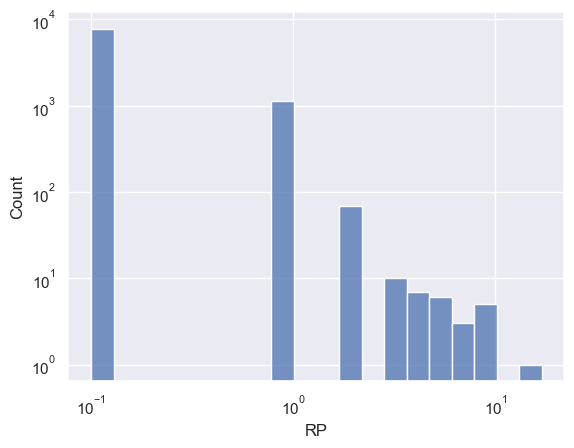

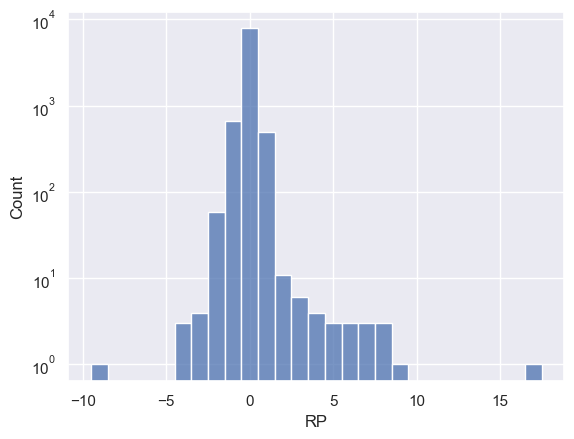

In [12]:
r_opt = data["RP"] - np.round(RP(result.x))
pd.Series(r_opt).describe()

_ = plt.figure()
g = sns.histplot(x=np.clip(np.abs(r_opt), 1e-1, 1e3), log_scale=True, bins=20)
g.axes.set_yscale('log')
#_ = g.bar_label(g.containers[1], labels=[str(v) if v else '' for v in g.containers[1].datavalues])

_ = plt.figure()
g = sns.histplot(x=r_opt, discrete=1)
_ = g.axes.set_yscale('log')
#_ = g.bar_label(g.containers[1], labels=[str(v) if v else '' for v in g.containers[1].datavalues])

In [13]:

# What are the worst points?

df = data[["Pokemon", "ID", "Level", "MS lvl", "NatureP", "NatureN", "Sub Skill 1", "Sub Skill 2", "RP"]].copy()

df["fit"] = RP(result.x)
df["error"] = data["RP"] - np.round(RP(result.x))
df["error2"] = df["error"] ** 2

df = df.sort_values("error2", ascending=False).reset_index(drop=True)
df.head(100)

,Pokemon,ID,Level,MS lvl,NatureP,NatureN,Sub Skill 1,Sub Skill 2,RP,fit,error,error2
0,Glaceon,GlaceonNeutral276Skill Level Up MHelping Speed M,27.0,6.0,-,-,Skill Level Up M,Helping Speed M,2485.0,2468.0,17.0,289.0
1,Typhlosion,TyphlosionCareful273Berry Finding SHelping Spe...,27.0,3.0,Main Skill Chance,Ingredient Finding,Berry Finding S,Helping Speed M,1761.0,1752.0,9.0,81.0
2,Slaking,SlakingGentle271Inventory Up LDream Shard Bonus,27.0,1.0,Main Skill Chance,Energy Recovery,Inventory Up L,Dream Shard Bonus,1188.0,1197.0,-9.0,81.0
3,Raichu,RaichuNaughty313Helping Speed SInventory Up S,31.0,3.0,Speed of Help,Main Skill Chance,Helping Speed S,Inventory Up S,1663.0,1655.0,8.0,64.0
4,Charizard,CharizardNeutral273Berry Finding SHelping Speed M,27.0,3.0,-,-,Berry Finding S,Helping Speed M,1528.0,1520.0,8.0,64.0
5,Charizard,CharizardRash273Helping BonusHelping Speed M,27.0,3.0,Ingredient Finding,Main Skill Chance,Helping Bonus,Helping Speed M,1440.0,1432.0,8.0,64.0
6,Charizard,CharizardMild276Helping Speed MSkill Level Up M,27.0,6.0,Ingredient Finding,Energy Recovery,Helping Speed M,Skill Level Up M,1514.0,1507.0,7.0,49.0
7,Charizard,CharizardMild276Skill Level Up MHelping Speed M,27.0,6.0,Ingredient Finding,Energy Recovery,Skill Level Up M,Helping Speed M,1514.0,1507.0,7.0,49.0
8,Charizard,CharizardNeutral273Inventory Up MHelping Speed M,27.0,3.0,-,-,Inventory Up M,Helping Speed M,1299.0,1292.0,7.0,49.0
9,Leafeon,LeafeonBrave102Helping Speed S,10.0,2.0,Speed of Help,EXP Gains,Helping Speed S,,919.0,913.0,6.0,36.0
